In [ ]:
%%capture
# will take approx 5 min
import os
if not os.path.exists('open-images-bus-trucks'):
    %pip install torch_snippets ultralytics
    !wget --quiet https://www.dropbox.com/s/agmzwk95v96ihic/open-images-bus-trucks.tar.xz
    !tar -xf open-images-bus-trucks.tar.xz
    !rm open-images-bus-trucks.tar.xzd

In [ ]:
from torch_snippets import *
def prepare_yolo_data(image_folder, labels_folder, train_txt, val_txt, output_folder):
    def prepare_yolo_split(split, image_folder, labels_folder, txt, output_folder):
        items = readlines(txt)
        for item in items:
            item = stem(item)
            im_to = output_folder/'images'/split/f'{item}.jpg'
            ann_to = output_folder/'labels'/split/f'{item}.txt'
            makedir(parent(im_to)), makedir(parent(ann_to))
            im = image_folder/f'{item}.jpg'
            ann = labels_folder/f'{item}.txt'
            im.cp(im_to)
            ann.cp(ann_to)
    prepare_yolo_split('train',image_folder,labels_folder,train_txt,output_folder)
    prepare_yolo_split('val',image_folder,labels_folder,val_txt,output_folder)

data_version = 'all'
yolo_path = P(f'./yolo-open-images-bus-trucks-{data_version}')
try: yolo_path.rmtree(force=True)
except: ...
prepare_yolo_data(
    P('open-images-bus-trucks/images'),
    P(f'open-images-bus-trucks/yolo_labels/{data_version}/labels/'),
    P(f'open-images-bus-trucks/yolo_labels/{data_version}/train.txt'),
    P(f'open-images-bus-trucks/yolo_labels/{data_version}/val.txt'),
    P(yolo_path)
)

In [ ]:
%%writefile bus_truck_all.yaml

path: /content/yolo-open-images-bus-trucks-all/ # dataset root dir
train: images/train # train images (relative to 'path') 4 images
val: images/val # val images (relative to 'path') 4 images

# Classes
names:
  0: bus
  1: truck

Overwriting bus_truck_all.yaml


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)
_ = model.train(data=f"bus_truck_{data_version}.yaml", epochs=3)  # train the model

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=bus_truck_all.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning /content/yolo-open-images-bus-trucks-all/labels/train... 12439 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12439/12439 [00:07<00:00, 1698.78it/s]


train: New cache created: /content/yolo-open-images-bus-trucks-all/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/yolo-open-images-bus-trucks-all/labels/val... 5104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5104/5104 [00:03<00:00, 1594.09it/s]


val: New cache created: /content/yolo-open-images-bus-trucks-all/labels/val.cache
Plotting labels to /usr/local/lib/python3.10/dist-packages/tests/tmp/runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /usr/local/lib/python3.10/dist-packages/tests/tmp/runs/detect/train4
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      6.79G      1.088      1.507      1.416         18        640: 100%|██████████| 778/778 [07:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 160/160 [01:05<00:00,  2.44it/s]


                   all       5104       6016      0.455      0.429      0.353      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3       7.1G      1.114      1.384      1.432         19        640: 100%|██████████| 778/778 [07:16<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 160/160 [01:01<00:00,  2.58it/s]


                   all       5104       6016      0.551      0.527      0.471      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      7.12G     0.9927      1.185      1.337         21        640: 100%|██████████| 778/778 [07:10<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 160/160 [01:00<00:00,  2.63it/s]


                   all       5104       6016      0.578      0.615      0.554      0.409

3 epochs completed in 0.424 hours.
Optimizer stripped from /usr/local/lib/python3.10/dist-packages/tests/tmp/runs/detect/train4/weights/last.pt, 52.0MB
Optimizer stripped from /usr/local/lib/python3.10/dist-packages/tests/tmp/runs/detect/train4/weights/best.pt, 52.0MB

Validating /usr/local/lib/python3.10/dist-packages/tests/tmp/runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 160/160 [01:06<00:00,  2.41it/s]


                   all       5104       6016      0.578      0.615      0.554      0.409
                   bus       5104       2946      0.598      0.605      0.542      0.428
                 truck       5104       3070      0.558      0.624      0.565       0.39
Speed: 0.2ms preprocess, 6.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /usr/local/lib/python3.10/dist-packages/tests/tmp/runs/detect/train4



image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/0052607b78f01646.jpg: 480x640 1 truck, 113.3ms
Speed: 2.0ms preprocess, 113.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


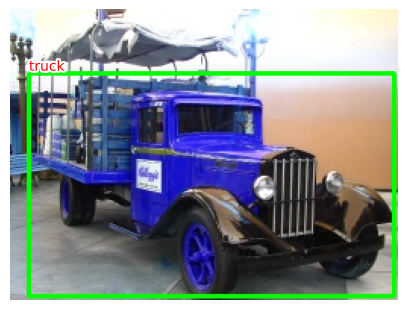


image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/021ca4c5dd621cd5.jpg: 448x640 1 truck, 132.4ms
Speed: 4.4ms preprocess, 132.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


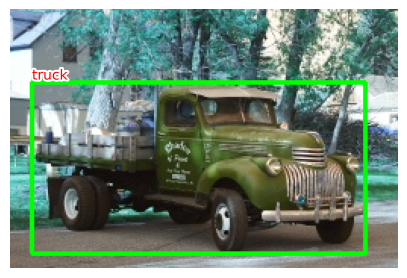


image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/00b21814b93ce5df.jpg: 448x640 1 truck, 28.0ms
Speed: 3.0ms preprocess, 28.0ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


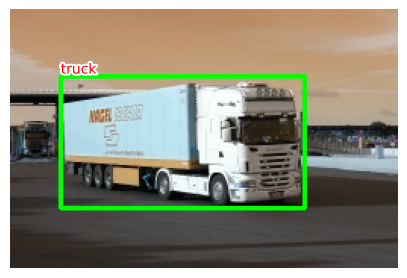


image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/00a56327032571c8.jpg: 448x640 1 bus, 39.1ms
Speed: 9.8ms preprocess, 39.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


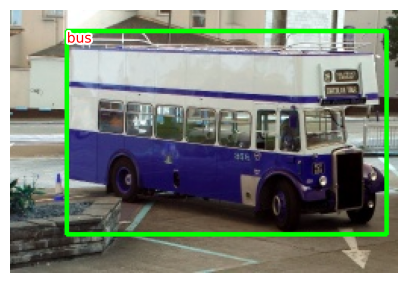


image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/01a6f5c9661b6641.jpg: 480x640 1 bus, 26.5ms
Speed: 5.6ms preprocess, 26.5ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


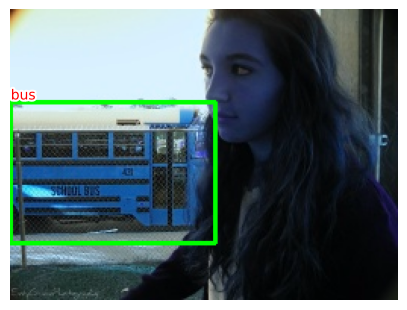


image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/00347f583cd63d8f.jpg: 480x640 1 bus, 39.4ms
Speed: 4.8ms preprocess, 39.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


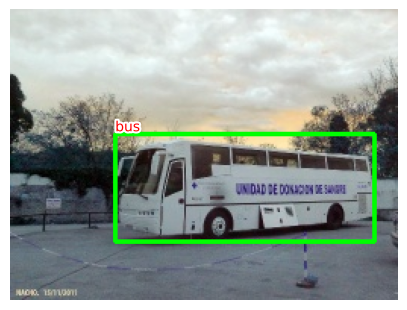


image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/0085d23a897ccf09.jpg: 448x640 1 bus, 26.0ms
Speed: 3.8ms preprocess, 26.0ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


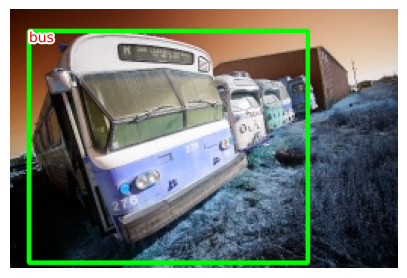


image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/021764ab0167feae.jpg: 352x640 1 bus, 188.5ms
Speed: 2.2ms preprocess, 188.5ms inference, 2.1ms postprocess per image at shape (1, 3, 352, 640)


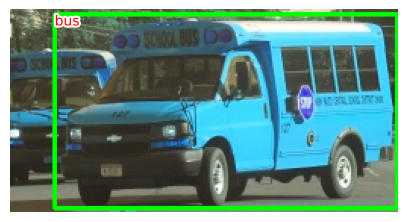


image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/01452e77f9270861.jpg: 448x640 1 bus, 42.4ms
Speed: 2.7ms preprocess, 42.4ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


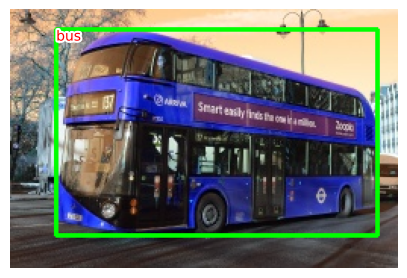


image 1/1 /content/yolo-open-images-bus-trucks-mini/images/val/00a09b822d470896.jpg: 448x640 1 bus, 30.1ms
Speed: 2.5ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


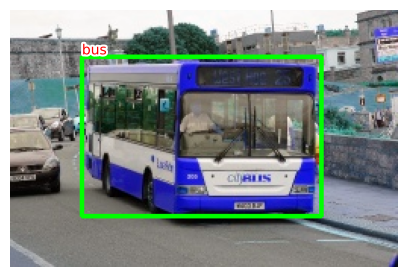

In [ ]:
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
val_images = Glob("/content/yolo-open-images-bus-trucks-mini/images/val/")

for _ in range(10):
    results = model(choose(val_images))
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
    classes = [results[0].names[cls] for cls in results[0].boxes.cls.cpu().numpy()]
    show(results[0].orig_img, bbs=boxes, texts=classes, sz=5, text_sz=10)